In [28]:
import labhelper as hp
import sympy as sp

In [36]:
sp.Symbol("(x_{a}^{b} + mu) / (t_1 + epsilon)").subs({"mu": 5})

In [43]:
vars_in=["x^a", "t_1"]
const_in=["mu", "epsilon"]
func_str="(x^a + mu) / (t_1 + epsilon)"
h = hp.Helper(func_str=func_str, vars_in=vars_in, const_in=const_in)

Variables:


Constants:


Function:


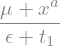

In [44]:
h.display_data()

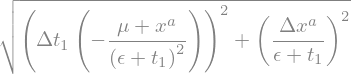

In [46]:
h.calculate_error_function()
h.error_function

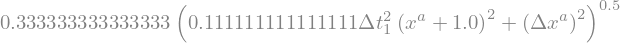

In [49]:
h.evaluate_error_function({"mu": 1, "epsilon": 1, "t_1": 2})

In [6]:
h.solve_error_function_for_variable("\Delta A", 2.236, {"A": 1, "B": 1, "\Delta B": 2})

In [7]:
h.solve_error_function_for_variable("\Delta A", symbolically = True)
h.errors[0].name

'\\Delta A'

In [8]:
h.solve_error_function_for_all_variables(function_value=2.236, rest_of_variables={"A": 1, "B": 1, "\Delta A": 1, "\Delta B": 2})

---------------


=



---------------
---------------


=



---------------


In [9]:
df = hp.df_create(["Column 1", "Potatoes", "n"], 8)
df

,Column 1,Potatoes,n
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0


In [10]:
hp.df_switch_columns(df, "Potatoes", "n")

,Column 1,n,Potatoes
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0


In [11]:
hp.student_t_n(3, 0.95)